In [1]:
import b2sim.engine as b2
import b2sim.analysis as dd

## Preliminary Comparison

First, let's get a rough gauge of what's happening by computing the equivalent eco impact of a farm from R10 start to R13 end

,Time,Type,Message
0,249.2,Eco,Change eco to Zero
1,249.5,Round,Round 10 start
2,265.2,Round,Round 11 start
3,284.0,Round,Round 12 start
4,306.8,Round,Round 13 start
5,328.8,Round,Round 14 start


,Revenue,Expenses,Profit,Eco Impact,Start Time,End Time
Farm Index,,,,,,
0,1160,0,1160,88.0,249.0,329.0


The current cash and eco are (1160,0)


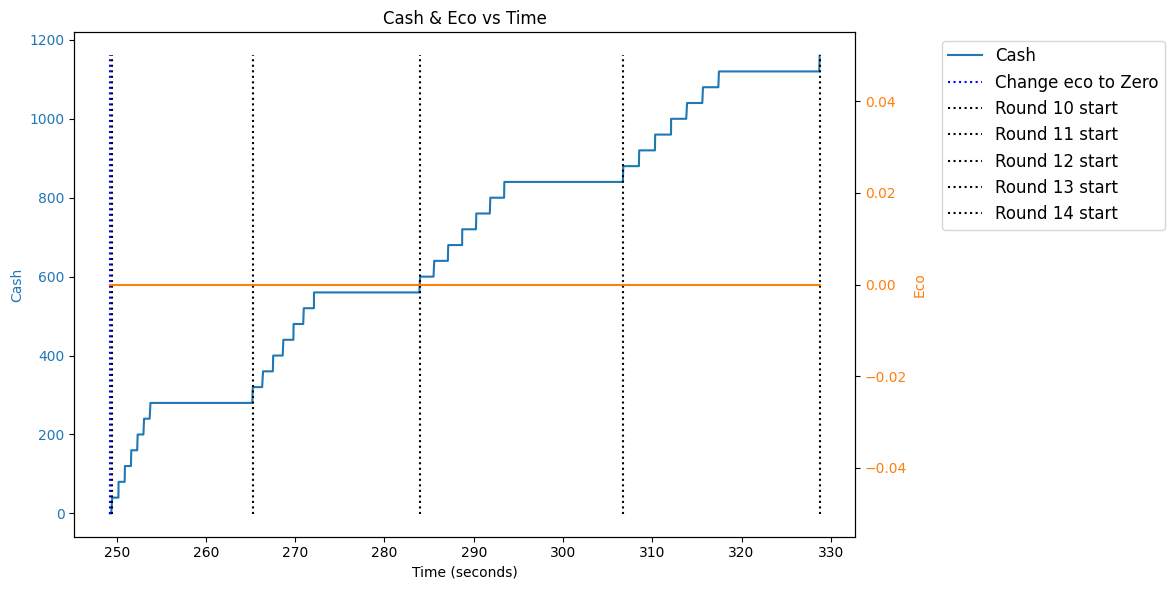

In [8]:
rounds = b2.Rounds(0.5)

farms = [
    b2.initFarm(rounds.getTimeFromRound(7), upgrades = [2,0,0])
]

initial_state_game = {
    'Cash': 0,
    'Eco': 0,
    'Eco Send': b2.ecoSend(send_name = 'Zero'),
    'Rounds': rounds, #Determines the lengths of the rounds in the game state
    'Farms': farms,
    'Game Round': 9.99
}

game_state = b2.GameState(initial_state_game)
game_state.fastForward(target_round = 14)
dd.viewHistory(game_state)
print("The current cash and eco are (%s,%s)"%(game_state.cash, game_state.eco))
b2.writeLog(game_state.logs, filename = 'bw_compare')

## Simulations

Next, we compare two common game scenarios. In both, the player has access to 1 x 200 farm and a decent amount of eco at the start of R6. 

In one simulation, we choose to use white eco and farm, while in the other we choose to use black eco instead. The results at the start of R9 are recorded.

[{'Time': 108.30000000000001, 'Send Name': 'Spaced Whites', 'Max Send Amount': None, 'Fortified': False, 'Camoflauge': False, 'Regrow': False, 'Max Eco Amount': None, 'Max Send Time': None, 'Queue Threshold': 6}]


,Time,Type,Message
0,136.1,Eco,Change eco to Spaced Whites
1,136.4,Round,Round 6 start
2,160.7,Round,Round 7 start
3,185.2,Round,Round 8 start
4,192.0,Buy,Buy Farm
5,207.2,Round,Round 9 start


,Revenue,Expenses,Profit,Eco Impact,Start Time,End Time
Farm Index,,,,,,
0,880.0,0,880.0,74.0,136.0,207.0
1,120.0,2100,-1980.0,47.0,192.0,207.0


The current cash and eco are (646.0,433.5)


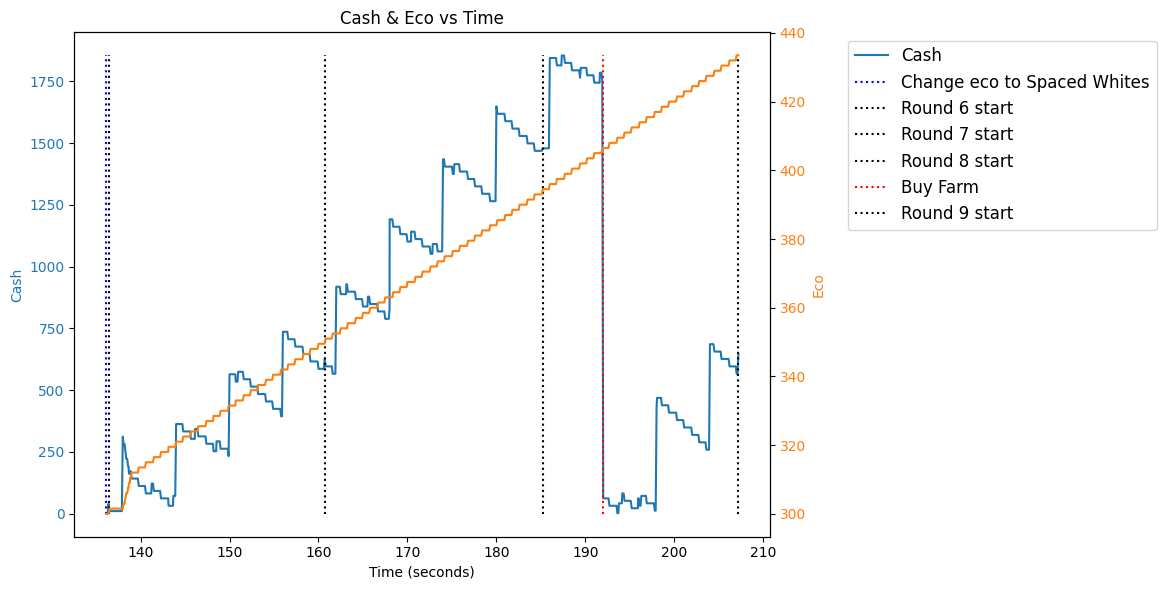

In [11]:
rounds = b2.Rounds(0.2)

farms = [
    b2.initFarm(rounds.getTimeFromRound(5), upgrades = [2,0,0])
]

buy_queue = [
    [b2.buyFarm()],
    [b2.upgradeFarm(1,upgrades=(2,0,0))],
    [b2.buyFarm()],
    [b2.upgradeFarm(2,upgrades=(2,0,0))],
    [b2.buyFarm((2,0,0))]
]

initial_state_game = {
    'Cash': 0,
    'Eco': 400,
    'Eco Send': b2.ecoSend(send_name = 'Spaced Whites'),
    'Rounds': rounds, #Determines the lengths of the rounds in the game state
    'Farms': farms,
    'Buy Queue': buy_queue,
    'Game Round': 5.99
}

game_state = b2.GameState(initial_state_game)
game_state.fastForward(target_round = 9)
dd.viewHistory(game_state)
print("The current cash and eco are (%s,%s)"%(game_state.cash, game_state.eco))
b2.writeLog(game_state.logs, filename = 'w_farm')